#Step 3
Optimization with uncertain conversion rates

In [19]:
import copy

import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.NoisyClairvoyant import  NoisyClairvoyant

%matplotlib inline

In [20]:
cust_json = "customer2.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"
arms = settings.prices

environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)

clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()

print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

In [21]:
print(sorted([(v, k) for k, v in rew_per_arm.items()])[-10:][::-1])

[(2630.97358496, (3, 2, 3, 1, 0)), (2624.912103872, (3, 2, 1, 3, 0)), (2623.32498512, (3, 2, 1, 1, 0)), (2622.992660096001, (3, 2, 3, 3, 0)), (2596.993820992, (3, 2, 1, 2, 0)), (2593.7951611520007, (3, 2, 3, 2, 0)), (2535.526255929, (3, 2, 1, 3, 2)), (2528.4117301660003, (3, 2, 3, 3, 2)), (2527.8807463099997, (3, 2, 3, 1, 2)), (2526.281639425, (3, 2, 1, 1, 2))]


In [22]:
n_arms = 4
n_products = 5 

TIME_HORIZON = 100
NUM_ITERATION = 1

In [23]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution())/2)

In [24]:
clairvoyant_rewards_iterations = []
for i in range(NUM_ITERATION):
    clairvoyant_learner = NoisyClairvoyant(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution, environment._get_aggregate_buy())
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        clairvoyant_super_arm = clairvoyant_learner.select_superarm()
        print(clairvoyant_super_arm)
        report = environment.round(clairvoyant_super_arm)
        clairvoyant_learner.update(clairvoyant_super_arm.copy(), report)
    clairvoyant_rewards = clairvoyant_learner.history_rewards
    clairvoyant_rewards_iterations.append(np.array(clairvoyant_rewards))
clairvoyant_rewards_iterations = np.array(clairvoyant_rewards_iterations)
clairvoyant_rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
loading: [===                           ] 10.0%
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
loading: [======                        ] 20.0%
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
loading: [=========                     ] 30.0%
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
loading: [============                  ] 40.0%
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3

(1, 100)

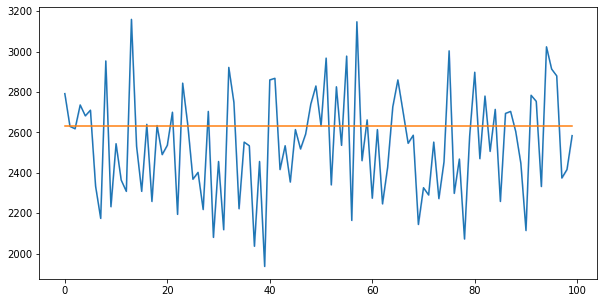

In [25]:
plt.figure(figsize=(10, 5))
mean = np.mean(clairvoyant_rewards_iterations, axis=0)
stdev = np.std(clairvoyant_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(clairvoyant_rewards))], [clairvoyant_reward for _ in range(len(clairvoyant_rewards))])
plt.show()

UCB

In [26]:
ucb_rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ucb_super_arm = ucb1_learner.select_superarm()
        print(ucb_super_arm)
        report = environment.round(ucb_super_arm)
        ucb1_learner.update(ucb_super_arm.copy(), report)
    ucb_rewards = ucb1_learner.history_rewards
    ucb_rewards_iterations.append(np.array(ucb_rewards))
ucb_rewards_iterations = np.array(ucb_rewards_iterations)
ucb_rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
[3, 2, 3, 2, 3]
[3, 2, 3, 3, 2]
[3, 2, 2, 3, 2]
[3, 2, 3, 3, 2]
[3, 2, 3, 2, 1]
[3, 2, 3, 2, 3]
[3, 3, 3, 2, 1]
[3, 2, 3, 2, 2]
[3, 2, 2, 3, 0]
loading: [===                           ] 10.0%
[3, 2, 1, 2, 0]
[3, 2, 1, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 1, 2, 0]
[3, 2, 1, 3, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 1, 0]
[3, 2, 1, 1, 2]
[3, 2, 3, 1, 0]
loading: [======                        ] 20.0%
[3, 2, 3, 1, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 3, 3]
[3, 2, 3, 3, 0]
[3, 2, 1, 2, 2]
[3, 2, 3, 3, 0]
[3, 2, 1, 3, 3]
[3, 2, 1, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 1, 0]
loading: [=========                     ] 30.0%
[3, 3, 1, 1, 0]
[3, 2, 3, 1, 0]
[3, 2, 3, 1, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 2, 0]
[3, 2, 1, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
loading: [============                  ] 40.0%
[3, 2, 3, 3, 0]
[3, 2, 1, 3, 2]
[3, 2, 3, 3, 2]
[3, 2, 3, 3, 0]
[3, 2, 2, 3, 3]
[3, 2, 3, 2, 1]
[3, 2, 1, 3

(1, 100)

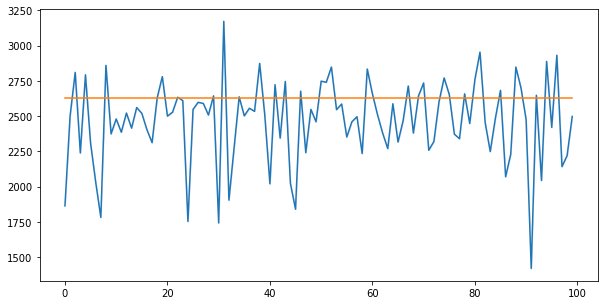

In [27]:
plt.figure(figsize=(10, 5))
mean = np.mean(ucb_rewards_iterations, axis=0)
stdev = np.std(ucb_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards))])
plt.show()

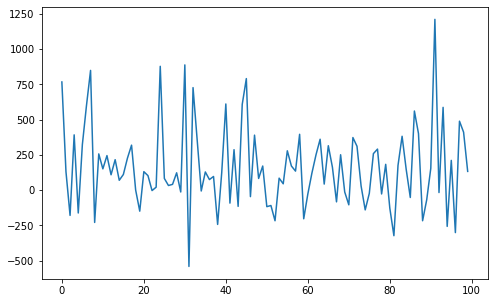

In [28]:
plt.figure(figsize=(8,5))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_mean_regret = np.mean(ucb_regret, axis=0)

plt.plot(range(len(ucb_mean_regret)), ucb_mean_regret)
plt.show()

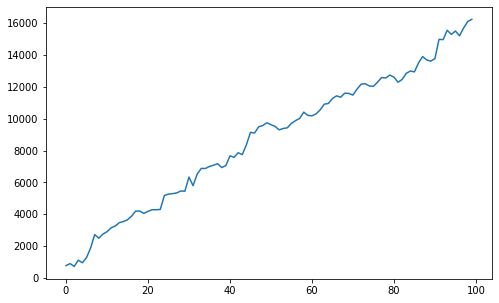

In [29]:
plt.figure(figsize=(8,5))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_cumulative_regret = np.cumsum(ucb_regret, axis=1)
ucb_cum_reg_mean = np.mean(ucb_cumulative_regret, axis=0)

plt.plot(range(len(ucb_cum_reg_mean)), ucb_cum_reg_mean)
plt.show()

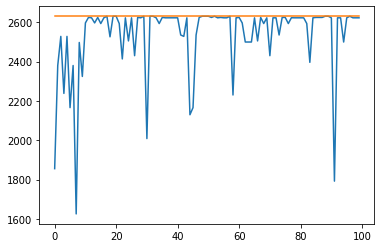

In [30]:
ucb_pulled_arms = ucb1_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ucb_pulled_arms]

plt.plot([i for i in range(len(ucb_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards)) ])
plt.show()


TS

In [31]:
ts_rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ts_super_arm = ts_learner.select_superarm()
        print(ts_super_arm)
        report = environment.round(ts_super_arm)
        ts_learner.update(ts_super_arm.copy(), report)
    ts_rewards = ts_learner.history_rewards
    ts_rewards_iterations.append(np.array(ts_rewards))
ts_rewards_iterations = np.array(ts_rewards_iterations)
ts_rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%
[3, 2, 2, 3, 3]
[3, 2, 3, 1, 2]
[2, 2, 3, 0, 2]
[3, 2, 3, 3, 0]
[3, 3, 0, 3, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 2]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 3, 0]
loading: [===                           ] 10.0%
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 1, 0]
[3, 2, 3, 2, 1]
[3, 2, 3, 3, 2]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 3, 0]
loading: [======                        ] 20.0%
[3, 2, 1, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 1, 3, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
loading: [=========                     ] 30.0%
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
loading: [============                  ] 40.0%
[3, 2, 3, 1, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 1, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 2, 0]
[3, 2, 3, 

(1, 100)

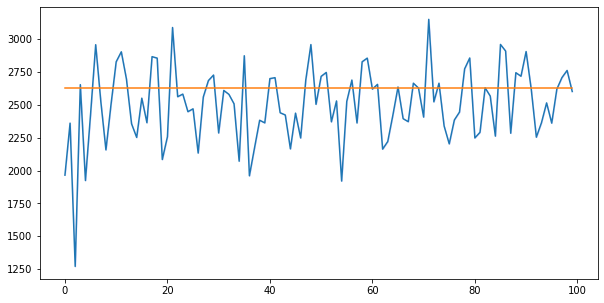

In [32]:
plt.figure(figsize=(10, 5))
mean = np.mean(ts_rewards_iterations, axis=0)
stdev = np.std(ts_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards))])
plt.show()

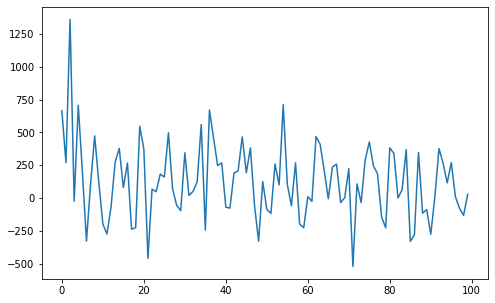

In [33]:
plt.figure(figsize=(8,5))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_mean_regret = np.mean(ts_regret, axis=0)

plt.plot(range(len(ts_mean_regret)), ts_mean_regret)
plt.show()

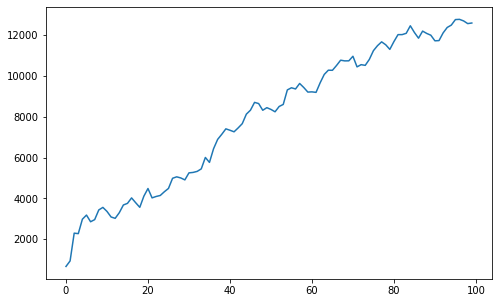

In [34]:
plt.figure(figsize=(8,5))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_cumulative_regret = np.cumsum(ts_regret, axis=1)
ts_cum_reg_mean = np.mean(ts_cumulative_regret, axis=0)

plt.plot(range(len(ts_cum_reg_mean)), ts_cum_reg_mean)
plt.show()

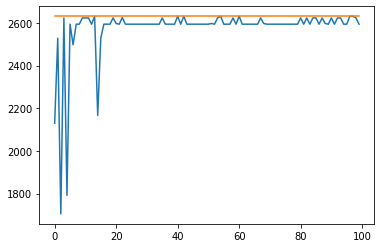

In [35]:
ts_pulled_arms = ts_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ts_pulled_arms]

plt.plot([i for i in range(len(ts_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards)) ])
plt.show()


In [36]:
th_rews = list(rew_per_arm.values())
th_rews.sort()
delta_arms = th_rews[-1] - th_rews[-2]
print(delta_arms)
print(ts_learner.t)
seen = sum(sum(sum(ts_learner.beta_parameters)))
print(np.log(seen))
theoretical_regret = 1024 * np.log(seen)/delta_arms
theoretical_regret

6.061481088000164
100
9.656627474604603


1631.3482448326079